# Marginal likelihood for Bayesian linear regression

Author: [Zeel B Patel](https://patel-zeel.github.io/), [Nipun Batra](https://nipunbatra.github.io/)

Bayesian linear regression is defined as below,

\begin{align}
\mathbf{y} &= X\boldsymbol{\theta} + \epsilon\\
\epsilon &\sim \mathcal{N}(0, \sigma_n^2)\\
\theta &\sim \mathcal{N}(\mathbf{m}_0, S_0)
\end{align}

For a Gaussian random variable $\mathbf{z} \sim \mathcal{N}(\boldsymbol{\mu}, \Sigma)$, $A\mathbf{z} + \mathbf{b}$ is also a Gaussian random variable.

\begin{align}
\mathbf{y} = X\mathbf{\theta} + \boldsymbol{\epsilon} &\sim \mathcal{N}(\boldsymbol{\mu}', \Sigma')\\
\boldsymbol{\mu}' &= \mathbb{E}_{\theta, \epsilon}(X\mathbf{\theta}+\boldsymbol{\epsilon})\\
                  &= X\mathbb{E}(\mathbf{\theta}) + \mathbb{E}(\mathbf{\epsilon})\\
                  &= X\mathbf{m}_0\\
                  \\
\Sigma' &= V(X\mathbf{\theta}+\boldsymbol{\epsilon})\\
        &= XV(\mathbf{\theta})X^T+V(\boldsymbol{\epsilon})\\
        &= XS_0X^T + \sigma_n^2I
\end{align}

Marginal likelihood is $p(\mathbf{y})$ so,

\begin{align}
p(\mathbf{y}) &= \frac{1}{(2\pi)^{\frac{N}{2}}|\Sigma'|^{\frac{1}{2}}}\exp\left[-\frac{1}{2}(\mathbf{y}-\boldsymbol{\mu}')^T\Sigma'^{-1}(\mathbf{y}-\boldsymbol{\mu}')\right]\\
              &= \frac{1}{(2\pi)^{\frac{N}{2}}|XS_0X^T + \sigma_n^2I|^{\frac{1}{2}}}\exp\left[-\frac{1}{2}(\mathbf{y}-X\mathbf{m}_0)^T(XS_0X^T + \sigma_n^2I)^{-1}(\mathbf{y}-X\mathbf{m}_0)\right]
\end{align}

## Multiplication of two Gaussians (work in progress)

We need Gaussian pdf over same variables to evaluate their multiplication. Let us convert $y$ into $\theta$.

\begin{align}
\mathbf{y} &= X\theta + \boldsymbol{\epsilon}\\
\theta &= (X^TX)^{-1}X^T(\mathbf{y} - \boldsymbol{\epsilon})\\
\text{Deriving mean and covariance of }\theta\\
E(\theta) &= (X^TX)^{-1}X^T\mathbf{y}\\
V(\theta) &= \sigma_n^2\left[(X^TX)^{-1}X^T\right]\left[(X^TX)^{-1}X^T\right]^T\\
          &= \sigma_n^2(X^TX)^{-1}X^TX(X^TX)^{-1}\\
          &= \sigma_n^2(X^TX)^{-1} 
\end{align}

Now, we have both $p(\mathbf{y}|\boldsymbol{\theta})$ and $p(\boldsymbol{\theta})$ in terms of $\boldsymbol{\theta}$. We can apply the rules from 6.5.2 of MML book. Writing our results in terminology of 6.5.2. 

\begin{align}
\mathcal{N}(x|a, A) &== \mathcal{N}(\theta|(X^TX)^{-1}X^T\mathbf{y}, \sigma_n^2(X^TX)^{-1})\\
\mathcal{N}(x|b, B) &== \mathcal{N}(\theta|\mathbf{m}_0, S_0)
\end{align}

we know that,

$$
c\mathcal{N}(\theta|\mathbf{c}, C) = \mathcal{N}(x|a, A)\mathcal{N}(x|b, B)\\
\mathcal{N}(\theta|\mathbf{c}, C) = \frac{\mathcal{N}(x|a, A)\mathcal{N}(x|b, B)}{c}
$$

In the Bayesian setting,

\begin{align}
Prior &\sim \mathcal{N}(x|b, B) == \mathcal{N}(\theta|\mathbf{m}_0, S_0)\\
Likelihood &\sim \mathcal{N}(x|a, A) == \mathcal{N}(\theta|(X^TX)^{-1}X^T\mathbf{y}, \sigma_n^2(X^TX)^{-1})\\
Posterior &\sim \mathcal{N}(\theta|\mathbf{c}, C) == \mathcal{N}(\theta|\mathbf{m}_n, S_n)\\
\text{last but not the least}\\
Marginal\;likelihood &\sim c == \mathcal{N}(\mathbf{y}|\boldsymbol{\mu}, \Sigma)
\end{align}

Let us evaluate the posterior,

\begin{align}
Posterior &\sim \mathcal{N}(\theta|\mathbf{c}, C)\\
S_n = C &= (A^{-1} + B^{-1})^{-1}\\
  &= \left(\frac{X^TX}{\sigma_n^2} + S_0^{-1}\right)^{-1}\\
\mathbf{m_n} = \mathbf{c} &= C(A^{-1}a + B^{-1}b)\\
           &= S_n\left(\frac{X^TX}{\sigma_n^2}(X^TX)^{-1}X^T\mathbf{y} + S_0^{-1}\mathbf{m}_0\right)\\
           &= S_n\left(\frac{X^T\mathbf{y}}{\sigma_n^2} + S_0^{-1}\mathbf{m}_0\right)
\end{align}

Now, we evaluate the marginal likelihood,

\begin{align}
c &= \mathcal{N}(\mathbf{y}|\boldsymbol{\mu}, \Sigma)\\
  &= (2\pi)^{-\frac{D}{2}}|A+B|^{-\frac{1}{2}}\exp\left(-\frac{1}{2}(a-b)^T(A+B)^{-1}(a-b)\right)\\
  &= (2\pi)^{-\frac{D}{2}}|\sigma_n^2(X^TX)^{-1}+S_0|^{-\frac{1}{2}}\exp\left(-\frac{1}{2}((X^TX)^{-1}X^T\mathbf{y}-\mathbf{m}_0)^T(\sigma_n^2(X^TX)^{-1}+S_0)^{-1}((X^TX)^{-1}X^T\mathbf{y}-\mathbf{m}_0)\right)
\end{align}

Another well-known formulation of marginal likelihood is the following,

$$
p(\mathbf{y}) \sim \mathcal{N}(X\mathbf{m}_0, XS_0X^T + \sigma_n^2I)
$$

Let us verify if both are the same, empirically,

In [67]:
import numpy as np
import scipy.stats
np.random.seed(0)

def ML1(X, y, m0, S0, sigma_n):
    N = len(y)
    return scipy.stats.multivariate_normal.pdf(y.ravel(), (X@m0).squeeze(), X@S0@X.T + np.eye(N)*sigma_n**2)

def ML2(X, y, m0, S0, sigma_n):
    D = len(m0)
    a = np.linalg.inv(X.T@X)@X.T@y
    b = m0
    A = np.linalg.inv(X.T@X)*sigma_n**2
    B = S0
    return scipy.stats.multivariate_normal.pdf(a.ravel(), b.ravel(), A+B)

def ML3(X, y, m0, S0, sigma_n):
    N = len(y)
    Sn = np.linalg.inv((X.T@X)/(sigma_n**2) + np.linalg.inv(S0))
    Mn = Sn@((X.T@y)/(sigma_n**2) + np.linalg.inv(S0)@m0)
    LML = -0.5*N*np.log(2*np.pi) - 0.5*N*np.log(sigma_n**2) - 0.5*np.log(np.linalg.det(S0)/np.linalg.det(Sn)) - 0.5*(y.T@y)/sigma_n**2 + 0.5*(Mn.T@np.linalg.inv(Sn)@Mn)
    return np.exp(LML)

X = np.random.rand(10,2)
m0 = np.random.rand(2,1)
s0 = np.random.rand(2,2)
S0 = s0@s0.T
sigma_n = 10
y = np.random.rand(10,1)

ML1(X, y, m0, S0, sigma_n), ML2(X, y, m0, S0, sigma_n),  ML3(X, y, m0, S0, sigma_n)

(9.577110083272389e-15, 0.0034284478634232078, array([[2.08309892e-14]]))

### Products of Gaussian PDFs (Work under progress)

Product of two Gaussians $\mathbf{x} \sim \mathcal{N}(\boldsymbol{\mu}_0, \Sigma_0)$ and $\mathbf{x} \sim \mathcal{N}(\boldsymbol{\mu}_1, \Sigma_1)$ is an unnormalized Gaussian.

\begin{align}
f(\mathbf{x}) &= \frac{1}{(2\pi)^{\frac{N}{2}}|\Sigma_0|^{\frac{1}{2}}}\exp\left[-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu}_0)^T\Sigma_0^{-1}(\mathbf{x}-\boldsymbol{\mu}_0)\right]\\
g(\mathbf{x}) &= \frac{1}{(2\pi)^{\frac{N}{2}}|\Sigma_1|^{\frac{1}{2}}}\exp\left[-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu}_1)^T\Sigma_1^{-1}(\mathbf{x}-\boldsymbol{\mu}_1)\right]\\
\int h(x) = \frac{1}{c}\int f(\mathbf{x})g(\mathbf{x})d\mathbf{x} &= 1
\end{align}

We need to find figure out value of $c$ to solve the integration.

\begin{align}
h(x) &= \frac{1}{(2\pi)^{\frac{N}{2}}|\Sigma|^{\frac{1}{2}}}\exp\left[-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^T\Sigma^{-1}(\mathbf{x}-\boldsymbol{\mu})\right] =  \frac{1}{(2\pi)^{\frac{N}{2}}|\Sigma|^{\frac{1}{2}}}\exp\left[-\frac{1}{2}\left(\mathbf{x}^T\Sigma^{-1}\mathbf{x} - 2\boldsymbol{\mu}^T\Sigma^{-1}\mathbf{x} + \boldsymbol{\mu}^T\Sigma^{-1}\boldsymbol{\mu}\right)\right]\\ 
f(x)g(x) &= \frac{1}{(2\pi)^{\frac{N}{2}}|\Sigma_0|^{\frac{1}{2}}(2\pi)^{\frac{N}{2}}|\Sigma_1|^{\frac{1}{2}}}\exp\left[
-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu}_0)^T\Sigma_0^{-1}(\mathbf{x}-\boldsymbol{\mu}_0) 
-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu}_1)^T\Sigma_1^{-1}(\mathbf{x}-\boldsymbol{\mu}_1)\right]\\
         &= \frac{1}{(2\pi)^{\frac{N}{2}}|\Sigma_0|^{\frac{1}{2}}(2\pi)^{\frac{N}{2}}|\Sigma_1|^{\frac{1}{2}}}\exp\left[
-\frac{1}{2}\left(\mathbf{x}^T(\Sigma_0^{-1}+\Sigma_1^{-1})\mathbf{x}- 2\boldsymbol{\mu}^T(\Sigma_0^{-1}+\Sigma_1^{-1})\mathbf{x} + \boldsymbol{\mu}^T(\Sigma_0^{-1}+\Sigma_1^{-1})\boldsymbol{\mu}\right)
\right]\\
\end{align}

We can compare the exponent terms directly. We get the following results by doing that

\begin{align}
\Sigma^{-1} &= \Sigma_0^{-1} + \Sigma_1^{-1}\\
\Sigma &= \left(\Sigma_0^{-1} + \Sigma_1^{-1}\right)^{-1}\\
\\
\boldsymbol{\mu}^T\Sigma^{-1}\mathbf{x} &= \boldsymbol{\mu_0}^T\Sigma_0^{-1}\mathbf{x} + \boldsymbol{\mu_1}^T\Sigma_1^{-1}\mathbf{x}\\
\left(\boldsymbol{\mu}^T\Sigma^{-1}\right)\mathbf{x} &= \left(\boldsymbol{\mu_0}^T\Sigma_0^{-1} + \boldsymbol{\mu_1}^T\Sigma_1^{-1}\right)\mathbf{x}\\
\boldsymbol{\mu}^T\Sigma^{-1} &= \boldsymbol{\mu_0}^T\Sigma_0^{-1} + \boldsymbol{\mu_1}^T\Sigma_1^{-1}\\
\text{Applying transpose on both sides,}\\
\Sigma^{-1}\boldsymbol{\mu} &= \Sigma_0^{-1}\boldsymbol{\mu}_0 + \Sigma_1^{-1}\boldsymbol{\mu}_1\\
\boldsymbol{\mu} &= \Sigma\left(\Sigma_0^{-1}\boldsymbol{\mu}_0 + \Sigma_1^{-1}\boldsymbol{\mu}_1\right)
\end{align}

Now, solving for the normalizing constant $c$,

\begin{align}
\frac{c}{(2\pi)^{\frac{N}{2}}|\Sigma|^{\frac{1}{2}}} &= \frac{1}{(2\pi)^{\frac{N}{2}}|\Sigma_0|^{\frac{1}{2}}(2\pi)^{\frac{N}{2}}|\Sigma_1|^{\frac{1}{2}}}\\
c &=  \frac{|\Sigma|^{\frac{1}{2}}}{(2\pi)^{\frac{N}{2}}|\Sigma_0|^{\frac{1}{2}}|\Sigma_1|^{\frac{1}{2}}}
\end{align}

If we have two Gaussians $\mathcal{N}(\mathbf{a}, A)$ and $\mathcal{N}(\mathbf{b}, B)$ for same random variable $\mathbf{x}$, Marginal likelihood can be given as,

$$
c = (2\pi)^{-N/2}|A+B|^{-1/2}\exp -\frac{1}{2}\left[(\mathbf{a} - \mathbf{b})^T(A+B)^{-1}(\mathbf{a} - \mathbf{b})\right]
$$

Here, we have two Gaussians $\mathcal{N}(0, \sigma^2I)$ and $\mathcal{N}((X^TX)^{-1}X^T\mathbf{y}, \frac{(X^TX)^{-1}}{\sigma_n^2} )$ for same random variable $\boldsymbol{\theta}$, Marginal likelihood can be given as,

$$
$$

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

((10, 5), (5, 1), (10, 1))

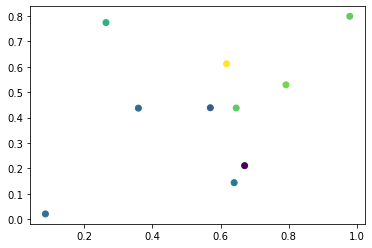

In [69]:
np.random.seed(0)
N = 10
D = 5
sigma_n = 0.1 # noise
sigma = 1 # variance in parameters
m0 = np.random.rand(D)
S0 = np.eye(D)*sigma**2

x = np.random.rand(N,D)
theta = np.random.rand(D,1)
y = x@theta + np.random.multivariate_normal(np.zeros(N), np.eye(N)*sigma_n**2, size=1).T
plt.scatter(x[:,0], x[:,1], c=y)
x.shape, theta.shape, y.shape

In [70]:
a = np.linalg.inv(x.T@x)@x.T@y
b = m0.reshape(-1,1)
A = np.linalg.inv(x.T@x)/(sigma_n**2)
B = S0
A_inv = np.linalg.inv(A)
B_inv = np.linalg.inv(B)

c_cov = np.linalg.inv(A_inv + B_inv)
c_mean = c_cov@(A_inv@a + B_inv@b)
a.shape, A.shape, b.shape, B.shape, c_mean.shape, c_cov.shape

((5, 1), (5, 5), (5, 1), (5, 5), (5, 1), (5, 5))

In [71]:
c_denom = 1/(((2*np.pi)**(D/2))*(np.linalg.det(c_cov)**0.5))
b_denom = 1/(((2*np.pi)**(D/2))*(np.linalg.det(B)**0.5))
a_denom = 1/(((2*np.pi)**(D/2))*(np.linalg.det(A)**0.5))
a_denom, b_denom, c_denom, 1/c_denom

(1.5040129154541655e-07,
 0.010105326013811642,
 0.0110028525380197,
 90.88552232655665)

In [72]:
normalizer_c = (1/(((2*np.pi)**(D/2))*(np.linalg.det(A+B)**0.5)))*np.exp(-0.5*((a-b).T@np.linalg.inv(A+B)@(a-b)))
norm_c_a_given_b = scipy.stats.multivariate_normal.pdf(a.squeeze(), b.squeeze(), A+B)
norm_c_b_given_a = scipy.stats.multivariate_normal.pdf(b.squeeze(), a.squeeze(), A+B)
normalizer_c, norm_c_a_given_b, norm_c_b_given_a, 1/normalizer_c

(array([[1.35765194e-07]]),
 1.357651942204283e-07,
 1.357651942204283e-07,
 array([[7365658.08152844]]))

In [73]:
a_pdf = scipy.stats.multivariate_normal.pdf(theta.squeeze(), a.squeeze(), A)
b_pdf = scipy.stats.multivariate_normal.pdf(theta.squeeze(), b.squeeze(), B)
c_pdf = scipy.stats.multivariate_normal.pdf(theta.squeeze(), c_mean.squeeze(), c_cov)

a_pdf, b_pdf, c_pdf, np.allclose(a_pdf*b_pdf, normalizer_c*c_pdf)

(1.5039199356435742e-07, 0.008635160418150373, 0.00956547808509135, True)

In [74]:
K = x@S0@x.T + np.eye(N)*sigma_n**2
marginal_Likelihood_closed_form = scipy.stats.multivariate_normal.pdf(y.squeeze(), (x@m0).squeeze(), K)
marginal_Likelihood_closed_form, 1/normalizer_c

(1.8288404157840938, array([[7365658.08152844]]))

In [75]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

splitter = KFold(n_splits=100)
for train_ind, test_ind in splitter(x):
    train_x, train_y = x[train_ind], y[train_ind]
    test_x, test_y = x[test_ind], y[test_ind]
    model = LinearRegression()
    model.fit(train_x, train_y)
    

TypeError: 'KFold' object is not callable

## What is the relationship between marginal_Likelihood_closed_form and any calculations done in multiplications of two gaussians?